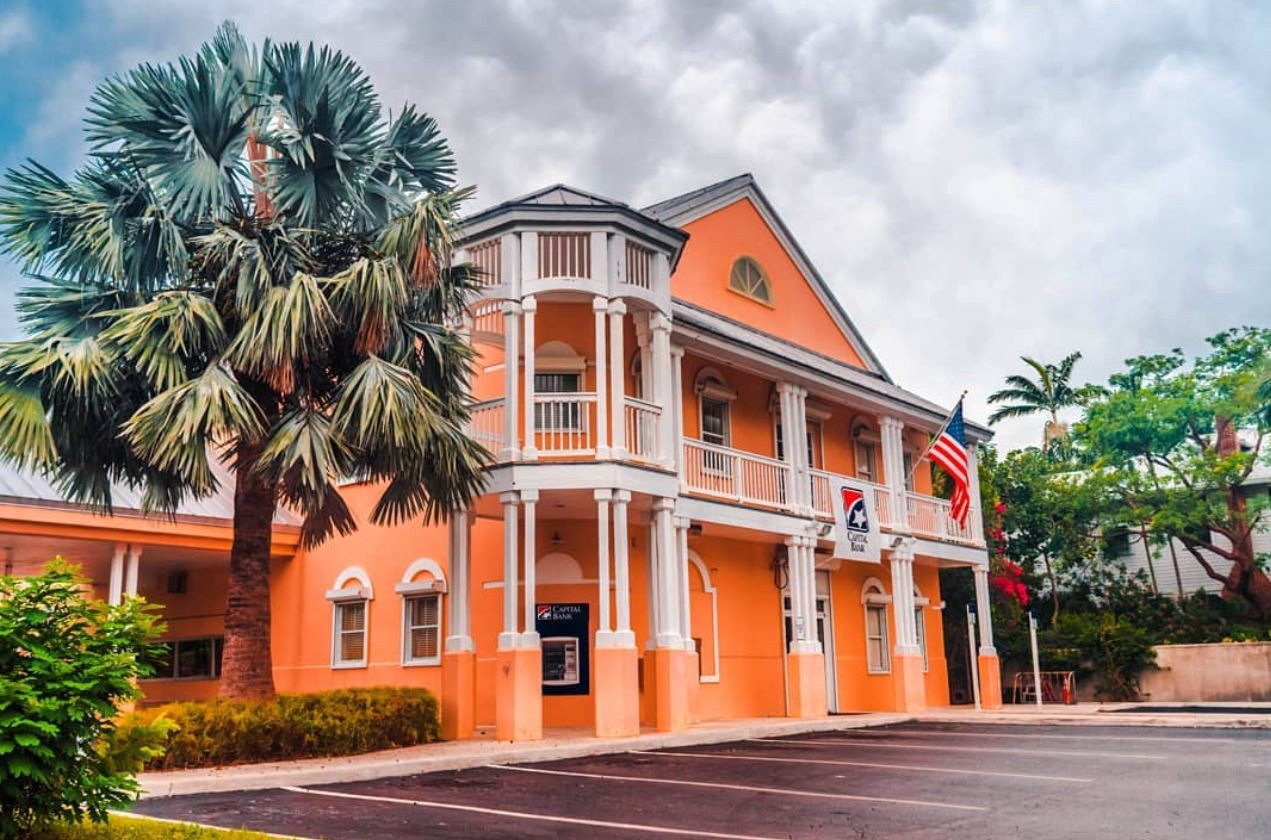

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv(r"C:\Users\SWASTI\OneDrive\Desktop\python/House.csv")
print(data.head())

   AvgAreaIncome  AvgAreaHouseAge  AvgAreaNumberofRooms  \
0    79545.45857         5.682861              7.009188   
1    79248.64245         6.002900              6.730821   
2    61287.06718         5.865890              8.512727   
3    63345.24005         7.188236              5.586729   
4    59982.19723         5.040555              7.839388   

   AvgAreaNumberofBedrooms  AreaPopulation         Price  \
0                     4.09     23086.80050  1.059034e+06   
1                     3.09     40173.07217  1.505891e+06   
2                     5.13     36882.15940  1.058988e+06   
3                     3.26     34310.24283  1.260617e+06   
4                     4.23     26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4        

In [3]:
fig = go.Figure(data=[go.Table(header=dict(values=list(data.columns),
fill_color='silver',align='left'),cells=dict
(values=[data.AvgAreaIncome,data.AvgAreaHouseAge,data.AvgAreaNumberofRooms,data.AvgAreaNumberofBedrooms,data.AreaPopulation,
         data.Price,data.Address]
,fill_color='wheat',align='center'))])
fig.update_layout(title="Housing Price Prediction Dataset")
fig.show()


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AvgAreaIncome            5000 non-null   float64
 1   AvgAreaHouseAge          5000 non-null   float64
 2   AvgAreaNumberofRooms     5000 non-null   float64
 3   AvgAreaNumberofBedrooms  5000 non-null   float64
 4   AreaPopulation           5000 non-null   float64
 5   Price                    5000 non-null   float64
 6   Address                  5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


AvgAreaIncome  AvgAreaHouseAge  AvgAreaNumberofRooms  \
count    5000.000000      5000.000000           5000.000000   
mean    68583.108984         5.977222              6.987792   
std     10657.991214         0.991456              1.005833   
min     17796.631190         2.644304              3.236194   
25%     61480.562390         5.322283              6.299250   
50%     68804.286405         5.970429              7.002902   
75%     75783.338665         6.650808              7.665871   
max    107701.748400         9.519088             10.759588   

       AvgAreaNumberofBedrooms  AreaPopulation         Price  
count              5000.000000     5000.000000  5.000000e+03  
mean                  3.981330    36163.516039  1.232073e+06  
std                   1.234137     9925.650114  3.531176e+05  
min                   2.000000      172.610686  1.593866e+04  
25%                   3.140000    29403.928700  9.975771e+05  
50%                   4.050000    36199.406690  1.232669e+06  
75%                   4.490000    42861.290770  1.471210e+06  
max                   6.500000    69621.713380  2.469066e+06

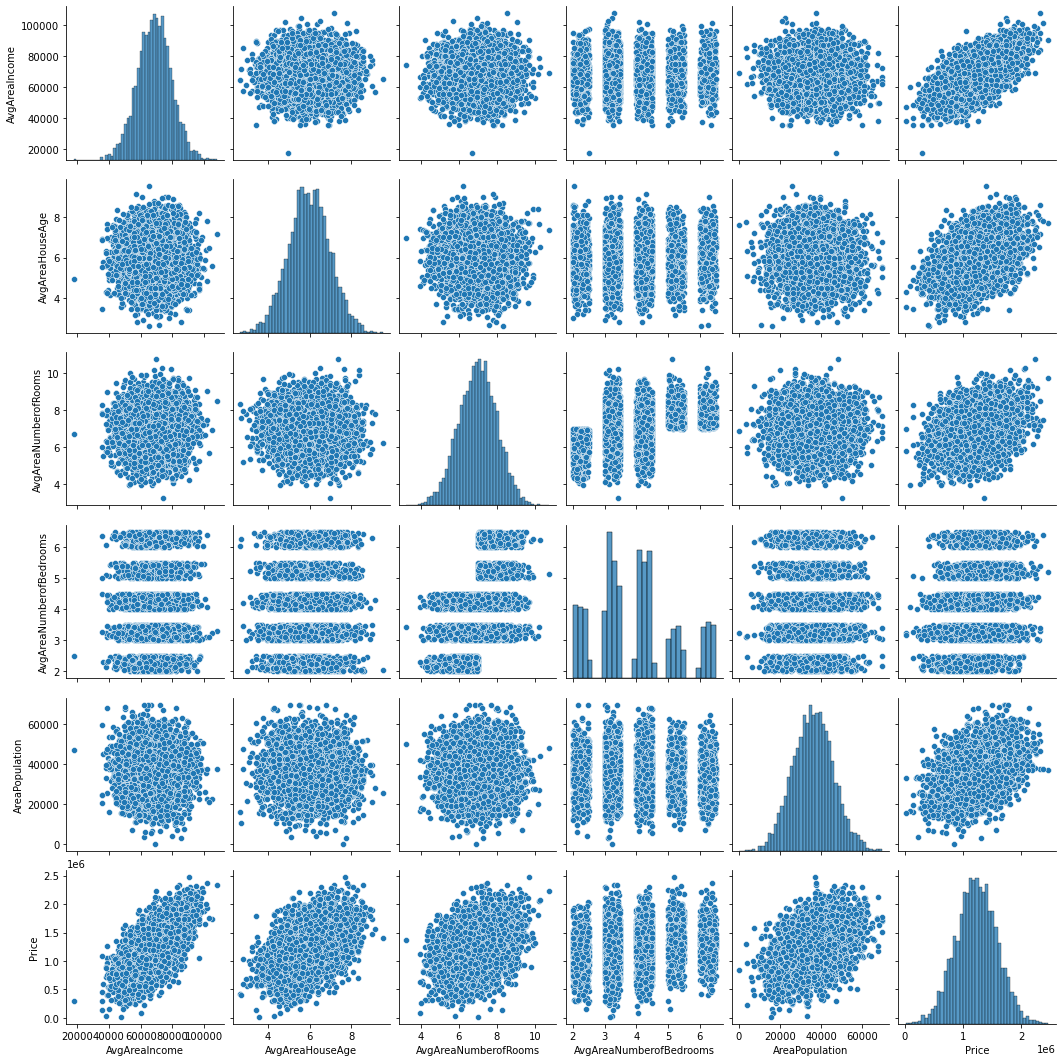

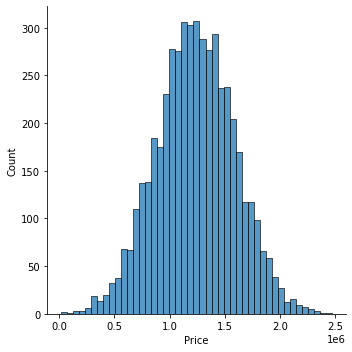

In [5]:
sns.pairplot(data)
sns.displot(data['Price'])
plt.show()

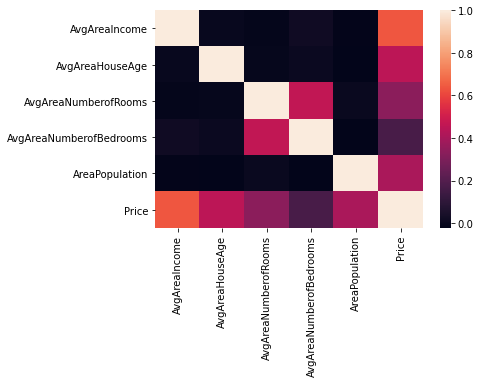

In [6]:
sns.heatmap(data.corr())
plt.show()

In [7]:
X = data[['AvgAreaIncome', 'AvgAreaHouseAge', 'AvgAreaNumberofRooms','AvgAreaNumberofBedrooms', 'AreaPopulation']]
Y = data['Price']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train ,Y_train )

LinearRegression()

In [9]:
print(lm.intercept_)

-2640159.7968126033


In [10]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff)

                           Coefficient
AvgAreaIncome                21.528276
AvgAreaHouseAge          164883.282027
AvgAreaNumberofRooms     122368.678023
AvgAreaNumberofBedrooms    2233.801864
AreaPopulation               15.150420


In [11]:
prediction = lm.predict(X_test)
print("Prediction  : ",prediction)

Prediction  :  [1260960.70581765  827588.75544668 1742421.24257416 ...  372191.4061306
 1365217.15136991 1914519.54191678]


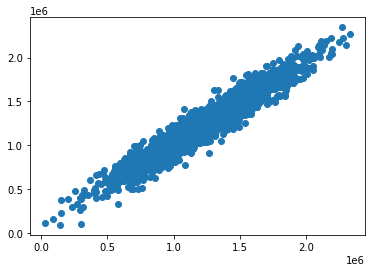

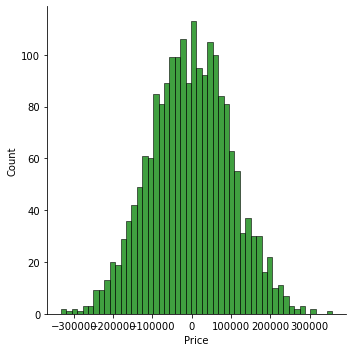

In [12]:
plt.scatter(Y_test,prediction)
sns.displot((Y_test-prediction),bins=50,color='green')
plt.show()

In [13]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))

MAE: 82288.22250721799
MSE: 10460958905.7755


In [14]:
prediction = lm.predict(X_test)
print("Prediction  : ",prediction)

Prediction  :  [1260960.70581765  827588.75544668 1742421.24257416 ...  372191.4061306
 1365217.15136991 1914519.54191678]


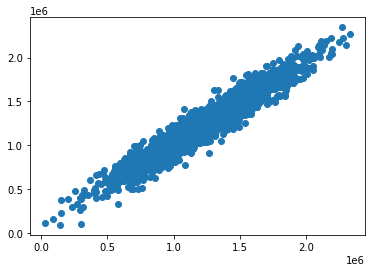

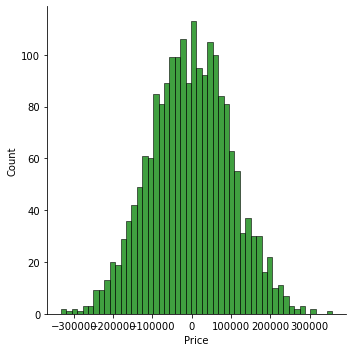

In [15]:
plt.scatter(Y_test,prediction)
sns.displot((Y_test-prediction),bins=50,color='green')
plt.show()

In [16]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))

MAE: 82288.22250721799
MSE: 10460958905.7755


In [17]:
Regressor = LinearRegression()
Regressor.fit(X_train , Y_train)
y_pred = Regressor.predict(X_test)
from sklearn.metrics import r2_score
R2score = r2_score(Y_test , y_pred)
print("Accuracy : ", R2score*100)

Accuracy :  91.76824009781797
